In [1]:
from datetime import datetime, timedelta
import pandas as pd
from pandas import Series,DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division
sns.set_style('whitegrid')

In [2]:
tx_data = pd.read_csv("D:\\DS_Projects\\Customer_Analytics\\customer segmentation.csv",encoding= 'unicode_escape')

In [3]:
tx_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate'])
tx_data['InvoiceYearMonth'] = tx_data['InvoiceDate'].map(lambda date:date.year*100 + date.month)
tx_data['Revenue'] = tx_data['Quantity']*tx_data['UnitPrice']

tx_revenue = tx_data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()

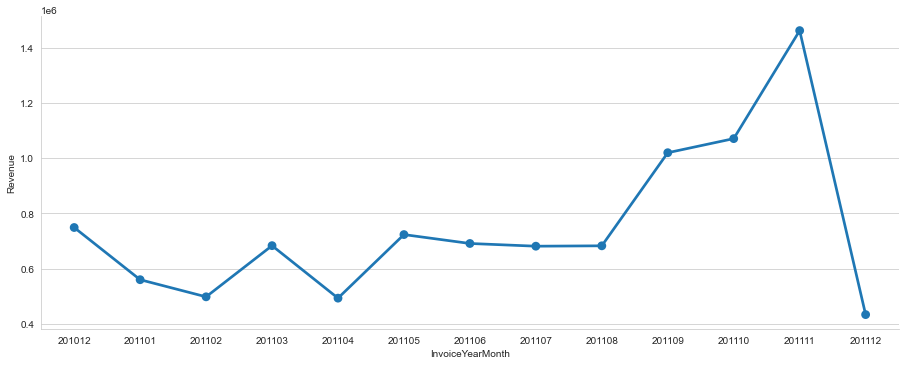

In [5]:
sns.catplot(x = 'InvoiceYearMonth',y = 'Revenue', data = tx_revenue, kind = "point", aspect = 2.5)

In [6]:
tx_revenue['Monthly Growth']=tx_revenue['Revenue'].pct_change()

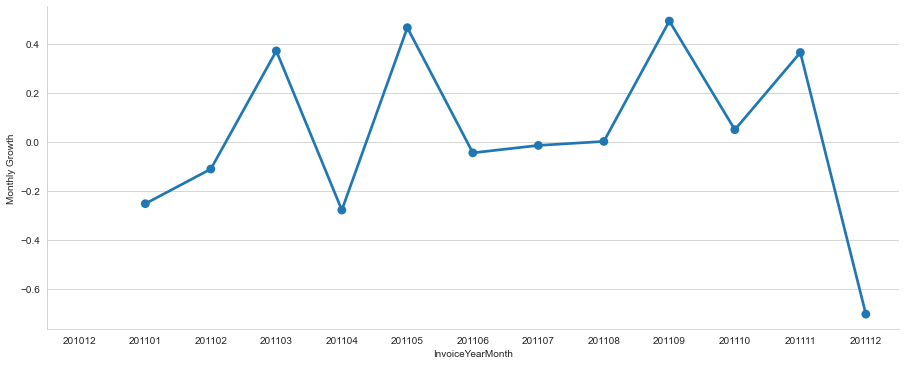

In [7]:
sns.catplot(x = 'InvoiceYearMonth',y = 'Monthly Growth', data = tx_revenue, kind = "point", aspect = 2.5)

In [8]:
tx_uk = tx_data[tx_data['Country'] == 'United Kingdom']

In [9]:
tx_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,201112,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,201112,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,201112,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,201112,214.80


In [10]:
tx_monthly_activeusers = tx_uk.groupby(['InvoiceYearMonth'])['CustomerID'].nunique().reset_index()

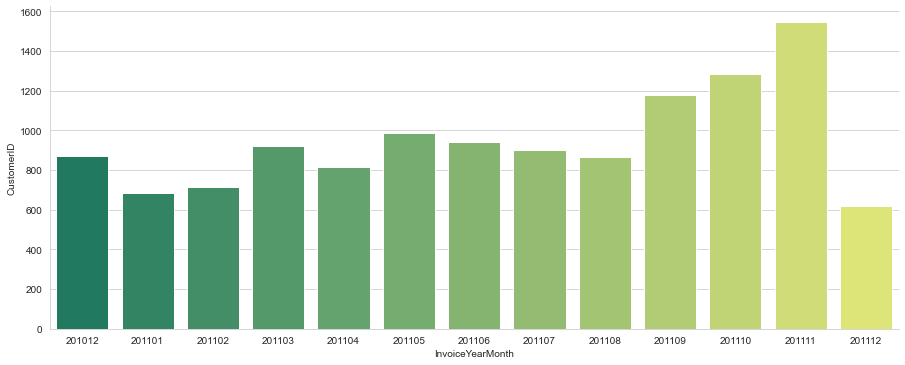

In [11]:
sns.catplot(x = 'InvoiceYearMonth',y = 'CustomerID', data = tx_monthly_activeusers, kind = "bar", aspect = 2.5 ,palette = 'summer')

In [12]:
tx_monthly_orders = tx_data.groupby(['InvoiceYearMonth'])['Quantity'].sum().reset_index()

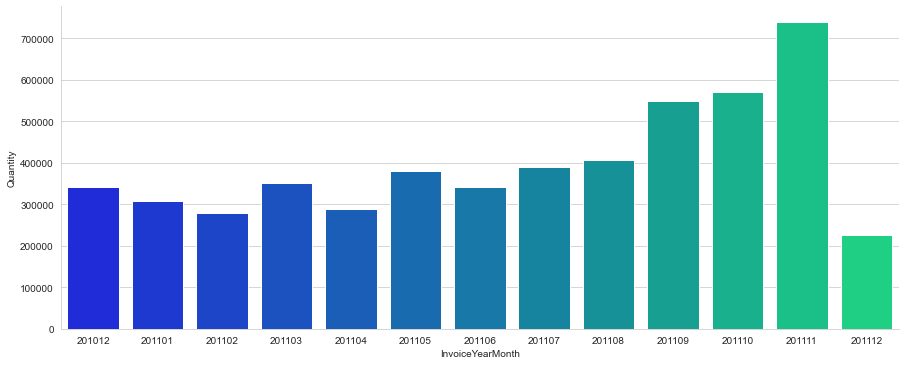

In [13]:
sns.catplot(x = 'InvoiceYearMonth',y = 'Quantity', data = tx_monthly_orders, kind = "bar", aspect = 2.5 ,palette = 'winter')

In [14]:
tx_monthly_avg_revenue = tx_uk.groupby(['InvoiceYearMonth'])['Revenue'].mean().reset_index()

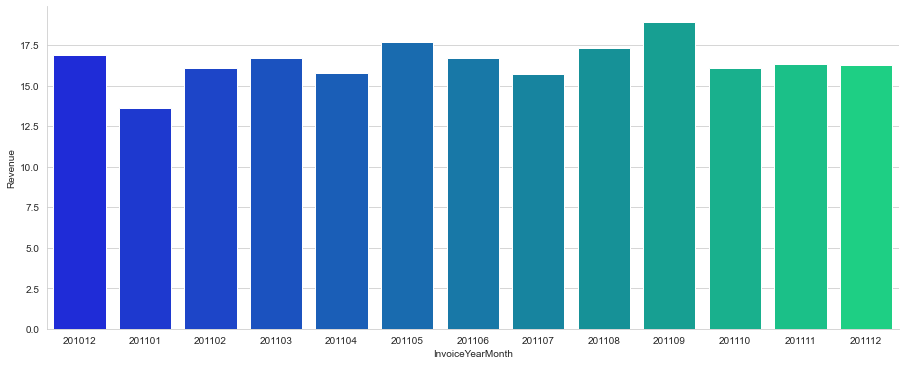

In [15]:
sns.catplot(x = 'InvoiceYearMonth',y = 'Revenue', data = tx_monthly_avg_revenue, kind = "bar", aspect = 2.5 ,palette = 'winter')

In [16]:
#create a dataframe contaning CustomerID and first purchase date

tx_first_purchase = tx_uk.groupby(['CustomerID'])['InvoiceDate'].min().reset_index()

tx_first_purchase.rename(columns = {'InvoiceDate' : 'First Purchase Date'}, inplace = True)

In [17]:
tx_first_purchase['FirstPurchase_YearMonth'] = tx_first_purchase['First Purchase Date'].map(lambda date :date.year*100+date.month)

In [18]:
#merge first purchase date column to our main dataframe (tx_uk)

tx_uk = pd.merge(tx_uk,tx_first_purchase, on = 'CustomerID')

In [19]:
tx_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,First Purchase Date,FirstPurchase_YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
...,...,...,...,...,...,...,...,...,...,...,...,...
361873,581416,22809,SET OF 6 T-LIGHTS SANTA,1,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,201112,2.95,2011-12-08 14:58:00,201112
361874,581416,22807,SET OF 6 T-LIGHTS TOADSTOOLS,2,2011-12-08 14:58:00,1.25,14569.0,United Kingdom,201112,2.50,2011-12-08 14:58:00,201112
361875,581416,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-12-08 14:58:00,2.10,14569.0,United Kingdom,201112,2.10,2011-12-08 14:58:00,201112
361876,581416,22809,SET OF 6 T-LIGHTS SANTA,2,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,201112,5.90,2011-12-08 14:58:00,201112


In [20]:
# Bifurcation to indentify new and existing users

tx_uk['User Type'] = 'New'
tx_uk.loc[tx_uk['InvoiceYearMonth']>tx_uk['FirstPurchase_YearMonth'],'User Type'] = 'Existing'

#if tx_uk['InvoiceYearMonth']<tx_uk['FirstPurchase_YearMonth']:
 #   tx_uk['User_Type'] = 'Existing'
#else:
 #   tx_uk['User_Type'] = 'New'
    
tx_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,First Purchase Date,FirstPurchase_YearMonth,User Type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361873,581416,22809,SET OF 6 T-LIGHTS SANTA,1,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,201112,2.95,2011-12-08 14:58:00,201112,New
361874,581416,22807,SET OF 6 T-LIGHTS TOADSTOOLS,2,2011-12-08 14:58:00,1.25,14569.0,United Kingdom,201112,2.50,2011-12-08 14:58:00,201112,New
361875,581416,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-12-08 14:58:00,2.10,14569.0,United Kingdom,201112,2.10,2011-12-08 14:58:00,201112,New
361876,581416,22809,SET OF 6 T-LIGHTS SANTA,2,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,201112,5.90,2011-12-08 14:58:00,201112,New


In [21]:
#calculate the Revenue per month for each user type

tx_usertype_revenue = tx_uk.groupby(['InvoiceYearMonth','User Type'])['Revenue'].sum().reset_index()

In [22]:
tx_usertype_revenue

,InvoiceYearMonth,User Type,Revenue
0,201012,New,483799.740
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860


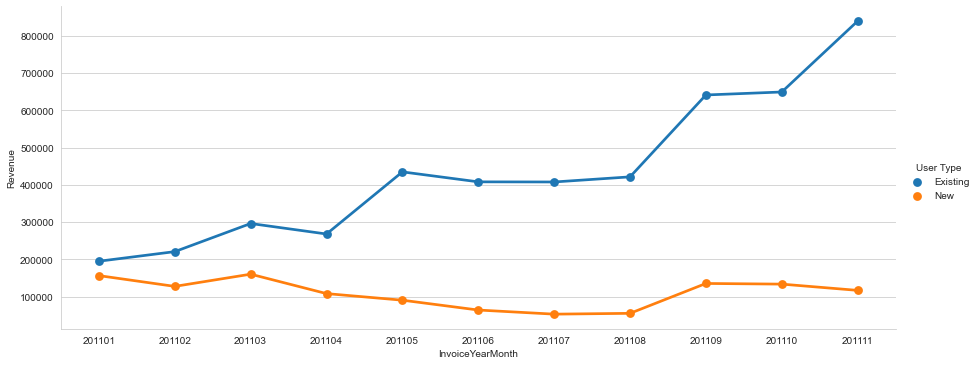

In [23]:
tx_usertype_revenue = tx_usertype_revenue.drop([0,23,24]).reset_index()

#plt.plot('InvoiceYearMonth','Revenue',hue = 'User Type',data = "tx_usertype_revenue")
a = sns.catplot(x ="InvoiceYearMonth",y ="Revenue",data = tx_usertype_revenue, hue ="User Type", kind ="point",aspect = 2.5)

In [24]:
tx_uk_new = tx_uk[tx_uk['User Type'] == 'New']
tx_uk_existing = tx_uk[tx_uk['User Type'] == 'Existing']

In [25]:
tx_uk_new = tx_uk_new.groupby(['InvoiceYearMonth'])['CustomerID'].nunique()

In [26]:
tx_uk_existing = tx_uk_existing.groupby(['InvoiceYearMonth'])['CustomerID'].nunique()

In [27]:
tx_uk_userratio_merged = pd.merge(tx_uk_new,tx_uk_existing, on = 'InvoiceYearMonth')
tx_uk_userratio_merged.rename(columns = {'CustomerID_x':'New','CustomerID_y':'Existing'},inplace = True)

In [28]:
tx_uk_userratio_merged['InvoiceYearMonth'] = tx_uk_userratio_merged.index

In [29]:
tx_uk_userratio_merged['Ratio'] = tx_uk_userratio_merged['New']/tx_uk_userratio_merged['Existing']

In [30]:
tx_uk_userratio_merged

,New,Existing,InvoiceYearMonth,Ratio
InvoiceYearMonth,,,,
201101,362,322,201101,1.124224
201102,339,375,201102,0.904000
201103,408,515,201103,0.792233
201104,276,541,201104,0.510166
201105,252,733,201105,0.343793
201106,207,736,201106,0.281250
201107,172,727,201107,0.236589
201108,140,727,201108,0.192572
201109,275,902,201109,0.304878


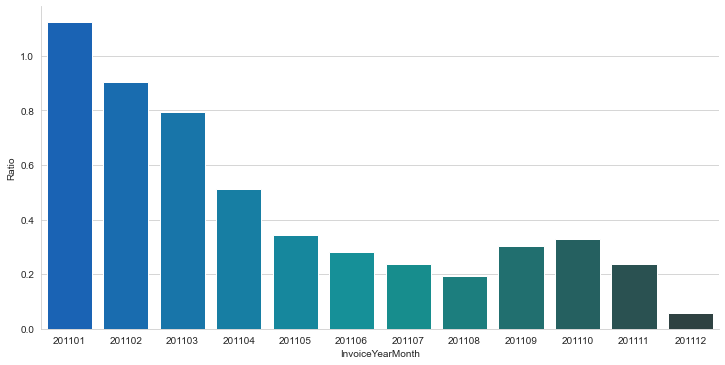

In [31]:
sns.catplot(x = 'InvoiceYearMonth',y = 'Ratio',data = tx_uk_userratio_merged,kind = 'bar',palette = 'winter_d',aspect = 2)

In [32]:
#identify which users are active by looking at their revenue per month

tx_active_user = tx_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()

In [33]:
#create retention matrix with crosstab

tx_retention = pd.crosstab(tx_active_user['CustomerID'],tx_active_user['InvoiceYearMonth']).reset_index()

tx_retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [34]:
#create an array of dictionary which keeps Retained & Total User count for each month

months = tx_retention.columns[2:]

retention_array = []

for i in range(len(months) - 1):
    retention_data = {}
    selected_month = months[i+1]
    previous_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['Total_Users'] = tx_retention[selected_month].sum()
    retention_data['Retained_User_Count'] = tx_retention[(tx_retention[selected_month] >0) & (tx_retention[previous_month] >0)][selected_month].sum()
    retention_array.append(retention_data)

In [35]:
retention_array = pd.DataFrame(retention_array)
retention_array['retention_ratio'] = retention_array['Retained_User_Count']/retention_array['Total_Users']

In [36]:
retention_array

,InvoiceYearMonth,Total_Users,Retained_User_Count,retention_ratio
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,985,369,0.374619
4,201106,943,417,0.442206
5,201107,899,379,0.421580
6,201108,867,391,0.450980
7,201109,1177,417,0.354291
8,201110,1285,502,0.390661
9,201111,1548,616,0.397933


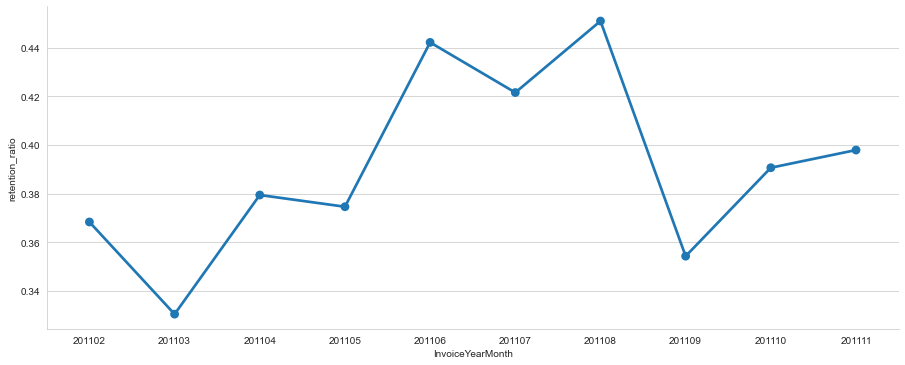

In [37]:
retention_array = retention_array.drop([10])
sns.catplot(x='InvoiceYearMonth',y='retention_ratio',data = retention_array,kind = 'point',aspect = 2.5)

In [38]:
cohort_crosstab = pd.crosstab(tx_active_user['CustomerID'],tx_active_user['InvoiceYearMonth']).reset_index()
cohort_retention = pd.merge(cohort_crosstab,tx_uk[['CustomerID','FirstPurchase_YearMonth']], on = 'CustomerID')

In [39]:
cohort_retention_columns = ["m_" + str(column) for column in cohort_retention.columns[:-1]]
cohort_retention_columns.append('FirstPurchase_YearMonth')
cohort_retention.columns = cohort_retention_columns

In [40]:
cohort_retention

,m_CustomerID,m_201012,m_201101,m_201102,m_201103,m_201104,m_201105,m_201106,m_201107,m_201108,m_201109,m_201110,m_201111,m_201112,FirstPurchase_YearMonth
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0,201101
1,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0,201101
2,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1,201012
3,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1,201012
4,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1,201012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361873,18287.0,0,0,0,0,0,1,0,0,0,0,1,0,0,201105
361874,18287.0,0,0,0,0,0,1,0,0,0,0,1,0,0,201105
361875,18287.0,0,0,0,0,0,1,0,0,0,0,1,0,0,201105
361876,18287.0,0,0,0,0,0,1,0,0,0,0,1,0,0,201105


In [41]:
retention_array = []

for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_month = months[:i]
    next_month = months[i+1:]
    
    for prev in prev_month:
        retention_data[prev] = np.nan
        
    total_users = cohort_retention[cohort_retention['FirstPurchase_YearMonth'] == selected_month].FirstPurchase_YearMonth.count()
    retention_data['Total User Count'] = total_users
    retention_data[selected_month] = 1
    
    query = "FirstPurchase_YearMonth == {}".format(selected_month)
    
    for nxt in next_month:
        new_query = query + "and m_{} > 0".format(str(nxt))
        retention_data[nxt] = np.round((cohort_retention.query(new_query)["m_" + str(nxt)]).sum()/total_users,2)
        
    retention_array.append(retention_data)
        

In [42]:
cohort_retention = pd.DataFrame(retention_array, index= [months])
cohort_retention

,Total User Count,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
InvoiceYearMonth,,,,,,,,,,,,,
201101,42674,1.0,0.36,0.46,0.44,0.54,0.51,0.47,0.48,0.56,0.58,0.67,0.34
201102,27690,NaN,1.00,0.40,0.38,0.48,0.49,0.45,0.46,0.51,0.49,0.54,0.20
201103,30908,NaN,NaN,1.00,0.32,0.43,0.41,0.40,0.34,0.41,0.43,0.56,0.20
201104,18199,NaN,NaN,NaN,1.00,0.36,0.35,0.34,0.35,0.42,0.44,0.48,0.14
201105,13527,NaN,NaN,NaN,NaN,1.00,0.38,0.29,0.30,0.34,0.42,0.39,0.25
201106,11531,NaN,NaN,NaN,NaN,NaN,1.00,0.40,0.25,0.50,0.48,0.57,0.21
201107,9205,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.27,0.50,0.54,0.56,0.39
201108,11535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.69,0.68,0.66,0.56
201109,13382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.55,0.61,0.31
